# Importing the Dependencies

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Data Collection, Data Processing and Analysis

In [2]:
car_dataset = pd.read_csv('car data.csv')

In [3]:
car_dataset.shape

(301, 9)

In [4]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
print(car_dataset['Fuel_Type'].value_counts())
print(car_dataset['Seller_Type'].value_counts())
print(car_dataset['Transmission'].value_counts())
print(car_dataset['Owner'].value_counts())
print(car_dataset['Year'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64
0    290
1     10
3      1
Name: Owner, dtype: int64
2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: Year, dtype: int64


In [8]:
X = car_dataset.drop(columns = ['Car_Name', 'Selling_Price'], axis = 1)
Y = car_dataset['Selling_Price']

In [9]:
print(X)

     Year  Present_Price  Kms_Driven Fuel_Type Seller_Type Transmission  Owner
0    2014           5.59       27000    Petrol      Dealer       Manual      0
1    2013           9.54       43000    Diesel      Dealer       Manual      0
2    2017           9.85        6900    Petrol      Dealer       Manual      0
3    2011           4.15        5200    Petrol      Dealer       Manual      0
4    2014           6.87       42450    Diesel      Dealer       Manual      0
..    ...            ...         ...       ...         ...          ...    ...
296  2016          11.60       33988    Diesel      Dealer       Manual      0
297  2015           5.90       60000    Petrol      Dealer       Manual      0
298  2009          11.00       87934    Petrol      Dealer       Manual      0
299  2017          12.50        9000    Diesel      Dealer       Manual      0
300  2016           5.90        5464    Petrol      Dealer       Manual      0

[301 rows x 7 columns]


In [10]:
X = np.array(X)

In [11]:
print(X)

[[2014 5.59 27000 ... 'Dealer' 'Manual' 0]
 [2013 9.54 43000 ... 'Dealer' 'Manual' 0]
 [2017 9.85 6900 ... 'Dealer' 'Manual' 0]
 ...
 [2009 11.0 87934 ... 'Dealer' 'Manual' 0]
 [2017 12.5 9000 ... 'Dealer' 'Manual' 0]
 [2016 5.9 5464 ... 'Dealer' 'Manual' 0]]


In [12]:
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [3, 4, 5])], remainder = 'passthrough')

X = ct.fit_transform(X)

In [13]:
print(X)

[[0.0 0.0 1.0 ... 5.59 27000 0]
 [0.0 1.0 0.0 ... 9.54 43000 0]
 [0.0 0.0 1.0 ... 9.85 6900 0]
 ...
 [0.0 0.0 1.0 ... 11.0 87934 0]
 [0.0 1.0 0.0 ... 12.5 9000 0]
 [0.0 0.0 1.0 ... 5.9 5464 0]]


In [14]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Splitting Training and Test data

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 2)

In [16]:
print(X.shape, X_train.shape, X_test.shape)

(301, 11) (270, 11) (31, 11)


In [17]:
print(X_train)

[[0.0 0.0 1.0 ... 4.43 28282 0]
 [0.0 0.0 1.0 ... 7.6 17000 0]
 [0.0 0.0 1.0 ... 13.6 21780 0]
 ...
 [0.0 0.0 1.0 ... 18.61 56001 0]
 [0.0 1.0 0.0 ... 10.79 43000 0]
 [0.0 0.0 1.0 ... 0.73 12000 0]]


In [18]:
print(X_test)

[[0.0 1.0 0.0 1.0 0.0 0.0 1.0 2010 20.45 50024 0]
 [0.0 0.0 1.0 0.0 1.0 0.0 1.0 2014 0.826 23000 0]
 [0.0 0.0 1.0 1.0 0.0 0.0 1.0 2014 6.76 40000 0]
 [0.0 1.0 0.0 1.0 0.0 0.0 1.0 2012 5.98 51439 0]
 [0.0 0.0 1.0 1.0 0.0 1.0 0.0 2015 14.79 12900 0]
 [0.0 0.0 1.0 1.0 0.0 0.0 1.0 2014 6.4 19000 0]
 [1.0 0.0 0.0 1.0 0.0 0.0 1.0 2011 7.74 49998 0]
 [0.0 1.0 0.0 1.0 0.0 0.0 1.0 2015 8.61 33429 0]
 [0.0 0.0 1.0 0.0 1.0 0.0 1.0 2013 0.47 21000 0]
 [0.0 0.0 1.0 1.0 0.0 0.0 1.0 2015 7.71 26000 0]
 [0.0 0.0 1.0 1.0 0.0 0.0 1.0 2015 10.0 18828 0]
 [0.0 1.0 0.0 1.0 0.0 0.0 1.0 2014 6.95 45000 0]
 [0.0 0.0 1.0 0.0 1.0 1.0 0.0 2014 0.52 19000 0]
 [0.0 0.0 1.0 1.0 0.0 0.0 1.0 2015 13.6 25000 0]
 [0.0 0.0 1.0 1.0 0.0 0.0 1.0 2011 4.43 57000 0]
 [0.0 0.0 1.0 0.0 1.0 0.0 1.0 2016 0.95 500 0]
 [0.0 0.0 1.0 0.0 1.0 0.0 1.0 2017 0.87 11000 0]
 [0.0 0.0 1.0 0.0 1.0 0.0 1.0 2017 0.52 15000 0]
 [0.0 1.0 0.0 1.0 0.0 0.0 1.0 2015 13.6 68000 0]
 [0.0 0.0 1.0 1.0 0.0 0.0 1.0 2015 5.8 40023 0]
 [0.0 0.0 1.0 0.0 1.0

In [19]:
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [20]:
print(X_train)

[[-0.06097108 -0.49420606  0.5        ... -0.37855906 -0.23844681
  -0.17474081]
 [-0.06097108 -0.49420606  0.5        ... -0.02276125 -0.51776898
  -0.17474081]
 [-0.06097108 -0.49420606  0.5        ...  0.6506731  -0.39942472
  -0.17474081]
 ...
 [-0.06097108 -0.49420606  0.5        ...  1.21299078  0.44782611
  -0.17474081]
 [-0.06097108  2.02344746 -2.         ...  0.33528135  0.12594457
  -0.17474081]
 [-0.06097108 -0.49420606  0.5        ... -0.79384358 -0.64156005
  -0.17474081]]


In [21]:
print(X_test)

[[-6.09710761e-02  2.02344746e+00 -2.00000000e+00  7.30815236e-01
  -7.30815236e-01 -3.92232270e-01  3.92232270e-01 -1.21068465e+00
   1.41951065e+00  2.99846267e-01 -1.74740811e-01]
 [-6.09710761e-02 -4.94206062e-01  5.00000000e-01 -1.36833491e+00
   1.36833491e+00 -3.92232270e-01  3.92232270e-01  1.45684045e-01
  -7.83068631e-01 -3.69219698e-01 -1.74740811e-01]
 [-6.09710761e-02 -4.94206062e-01  5.00000000e-01  7.30815236e-01
  -7.30815236e-01 -3.92232270e-01  3.92232270e-01  1.45684045e-01
  -1.17042059e-01  5.16699334e-02 -1.74740811e-01]
 [-6.09710761e-02  2.02344746e+00 -2.00000000e+00  7.30815236e-01
  -7.30815236e-01 -3.92232270e-01  3.92232270e-01 -5.32500301e-01
  -2.04588524e-01  3.34879139e-01 -1.74740811e-01]
 [-6.09710761e-02 -4.94206062e-01  5.00000000e-01  7.30815236e-01
  -7.30815236e-01  2.54950976e+00 -2.54950976e+00  4.84776217e-01
   7.84237580e-01 -6.19277656e-01 -1.74740811e-01]
 [-6.09710761e-02 -4.94206062e-01  5.00000000e-01  7.30815236e-01
  -7.30815236e-01 -

In [22]:
print(Y.shape, Y_train.shape, Y_test.shape)

(301,) (270,) (31,)


# Model Training
Model Training ---> Linear Regression

In [23]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [24]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [25]:
# prediction on training data
training_data_prediction = lin_reg_model.predict(X_train)

In [26]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print(f"R squared error: {error_score}")

R squared error: 0.8827144185732098


Visualize the Actual prices and Predicted prices

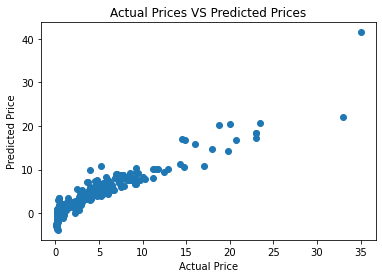

In [27]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices VS Predicted Prices")
plt.show()
# - So most values are close to each other.

In [28]:
# prediction on test data
test_data_prediction = lin_reg_model.predict(X_test)

In [29]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print(f"R squared error: {error_score}")

R squared error: 0.8695093348044306


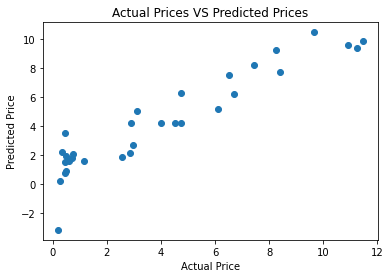

In [30]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices VS Predicted Prices")
plt.show()

# Model Training

Model Training ---> Lasso Regression

In [31]:
# loading the lasso regression model
lass_reg_model = Lasso()

In [32]:
lass_reg_model.fit(X_train, Y_train)

Lasso()

Model Evaluation

In [33]:
# prediction on training data
training_data_prediction = lass_reg_model.predict(X_train)

In [34]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print(f"R squared error: {error_score}")

R squared error: 0.7816936773057428


Visualize the Actual prices and Predicted prices

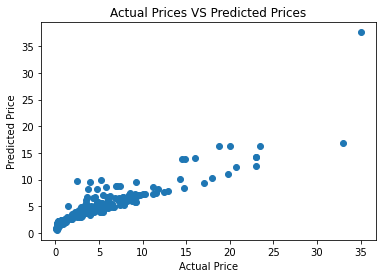

In [35]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices VS Predicted Prices")
plt.show()
# - So most values are close to each other.

In [36]:
# prediction on test data
test_data_prediction = lass_reg_model.predict(X_test)

In [37]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print(f"R squared error: {error_score}")

R squared error: 0.8019083851371718


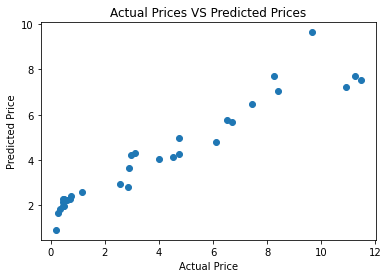

In [38]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices VS Predicted Prices")
plt.show()

# Model Training

Model Training ---> XGBoost Regressor

In [39]:
model = XGBRegressor()

In [40]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

Evaluation
1. R Squared Error
2. Mean Absolute Error

Prediction on training data

In [41]:
training_data_prediction = model.predict(X_train)

In [42]:
print(training_data_prediction)

[ 2.7497385   5.29012     9.707071    0.21910983  5.9664187   8.376411
  5.7726583   7.484542    5.199158   15.993424    0.79624665  0.4023785
  0.36596254  4.9168572   9.220988    0.38251746  6.0464816  19.744726
  2.5594828   6.853519    0.4518342   7.0737076   0.7156434   0.88199013
  0.3664727   0.39512128  3.985437    0.4327708   0.1089114  11.244416
  9.1035795   1.3603262   2.854528    0.49016628  1.5034752   2.497306
  1.1300797   0.6169014   0.75165796  0.50516206  3.7841136   4.852352
  0.55694985  2.747604    4.572154    0.48084465  1.3564912   7.3969274
  4.484366    5.371888    3.4881485   2.8943753   5.2049737   1.1495482
  0.5218579   2.8518722   1.9639448   4.516873    1.1047801   4.5005136
  6.27588     5.1113853   1.1815027  32.99967     2.260871    5.642755
  2.2506886   3.2510474   2.504026   11.502497    0.6674867   2.9957056
  0.30017126  1.4611881  12.877749    2.9477212   0.19194177  4.5032296
 14.25296     0.40274742  0.4107274   1.2229767   6.7452917   0.49569

In [43]:
score_1 = metrics.r2_score(Y_train, training_data_prediction)

score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print(f"R squared error: {score_1}")
print(f"Mean Absolute Error: {score_2}")

R squared error: 0.9999888216895415
Mean Absolute Error: 0.0118614504535993


Visualizing the actual Prices and predicted prices

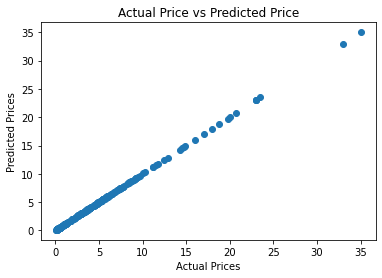

In [44]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

Prediction on test data

In [45]:
test_data_prediction = model.predict(X_test)

In [46]:
print(test_data_prediction)

[10.367255    0.53001624  3.7167053   3.1194873   9.5800705   4.797774
  3.1410618   6.321539    0.23040728  5.694832    7.9088836   4.44517
  0.46595922  8.71198     2.7301297   0.8279741   0.70074636  0.38856018
 10.4639845   4.000306    1.3372196   8.988223    0.3841983   9.863952
  0.5897085   7.135098    0.7288429   0.31937233  3.0590734   2.3611407
  0.4623672 ]


In [47]:
score_1 = metrics.r2_score(Y_test, test_data_prediction)

score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print(f"R squared error: {score_1}")
print(f"Mean Absolute Error: {score_2}")

R squared error: 0.975956556641448
Mean Absolute Error: 0.3654590484211522


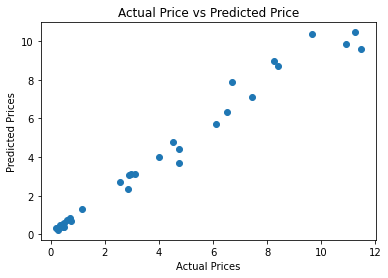

In [48]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

# Model Training

Model Training ---> Polynomial Regression

In [49]:
poly_reg = PolynomialFeatures(degree = 2)

X_poly = poly_reg.fit_transform(X_train)

model_LinearRegression = LinearRegression()

In [50]:
model_LinearRegression.fit(X_poly, Y_train)

LinearRegression()

Evaluation
1. R Squared Error
2. Mean Absolute Error

Prediction on training data

In [51]:
training_data_prediction = model_LinearRegression.predict(X_poly)

In [52]:
print(training_data_prediction)

[ 3.33154297e+00  5.93457031e+00  8.96728516e+00  2.91015625e-01
  5.71630859e+00  7.95019531e+00  6.22021484e+00  6.64062500e+00
  5.14160156e+00  1.59985352e+01  1.10595703e+00  3.21289062e-01
  2.80273438e-01  6.13134766e+00  7.82763672e+00  2.59277344e-01
  5.70312500e+00  1.76489258e+01  2.63330078e+00  7.84179688e+00
  2.20214844e-01  8.84570312e+00  5.24414062e-01  1.20654297e+00
  2.44140625e-02  2.79785156e-01  2.82470703e+00  2.35351562e-01
  3.67187500e-01  1.08481445e+01  7.82324219e+00  1.38720703e+00
  3.74658203e+00  3.48632812e-01  1.19677734e+00  2.38964844e+00
  1.08007812e+00  4.76562500e-01  7.82226562e-01  4.96582031e-01
  4.25097656e+00  4.13769531e+00  1.72363281e-01  2.09228516e+00
  4.61376953e+00  5.00000000e-01  1.68408203e+00  7.33105469e+00
  4.55810547e+00  4.26708984e+00  2.80273438e+00  2.53710938e+00
  4.42578125e+00  9.97070312e-01  2.51953125e-01  3.36621094e+00
  2.05322266e+00  4.55615234e+00  9.85351562e-01  6.03027344e+00
  7.56005859e+00  5.82226

In [53]:
score_1 = metrics.r2_score(Y_train, training_data_prediction)

score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print(f"R squared error: {score_1}")
print(f"Mean Absolute Error: {score_2}")

R squared error: 0.9820743525468474
Mean Absolute Error: 0.4909576099537037


Visualizing the actual Prices and predicted prices

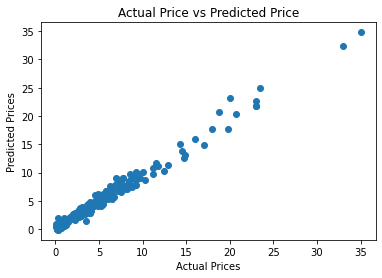

In [54]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

Prediction on test data

In [55]:
test_data_prediction = model_LinearRegression.predict(poly_reg.transform(X_test))

In [56]:
print(test_data_prediction)

[ 8.91796875e+00  3.60839844e-01  4.11230469e+00  3.10449219e+00
  1.03168945e+01  4.26171875e+00 -2.19370159e+13  6.52001953e+00
  1.90429688e-02  5.31884766e+00  6.87207031e+00  4.68359375e+00
  3.32031250e-02  8.85400391e+00  2.24121094e+00  9.90722656e-01
  1.00732422e+00  6.22070312e-01  1.00170898e+01  3.95312500e+00
  1.75146484e+00  9.41259766e+00  4.74121094e-01  9.79589844e+00
  5.10253906e-01  7.86230469e+00  6.45507812e-01  5.52734375e-01
  3.86035156e+00  2.41650391e+00  5.07324219e-01]


In [57]:
score_1 = metrics.r2_score(Y_test, test_data_prediction)

score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print(f"R squared error: {score_1}")
print(f"Mean Absolute Error: {score_2}")

R squared error: -1.1798933560063763e+24
Mean Absolute Error: 707645674319.2524


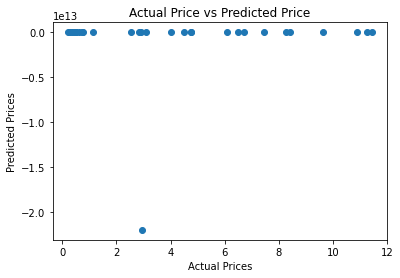

In [58]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

# Model Training

Model Training ---> Support Vector Regression

In [59]:
model_SVR = SVR(kernel = 'rbf')

In [60]:
model_SVR.fit(X_train, Y_train)

SVR()

Evaluation
1. R Squared Error
2. Mean Absolute Error

Prediction on training data

In [61]:
training_data_prediction = model_SVR.predict(X_train)

In [62]:
print(training_data_prediction)

[ 4.15838231  5.80482747  7.36437293  0.30056406  5.85056863  7.7852778
  5.98512785  6.1029022   4.99348761  8.00488485  1.09779668  0.65671723
  0.38359687  5.67920334  6.73233506  0.54140147  5.90826995  8.77128054
  3.33873898  7.15228944  0.40150804  7.23260606  0.67159165  1.13300841
  0.30074648  0.59129565  4.10002861  0.42364538  0.35299741  7.90235847
  6.73042927  1.25004743  4.91091049  0.56858998  2.40505872  3.19566589
  0.8066748   0.47011731  0.89624345  0.63544751  4.49227484  6.30315509
  0.58617952  1.51437914  5.82468023  0.71414296  1.20047106  6.19589495
  4.35751994  4.68136031  3.58996734  2.96060965  4.89786092  0.81537433
  0.38468874  4.39252733  1.99791122  4.35588524  0.73747702  5.51291137
  6.57508673  5.24459446  1.12996265 13.92427252  2.24325325  5.71940569
  2.67344424  3.34965908  3.27738333  8.94647994  0.99493523  2.90644855
  0.64141138  1.25930541  8.66272248  2.35381186  0.80268298  4.78692876
  9.52295215  0.64613773  0.74045613  2.21353188  5.

In [63]:
score_1 = metrics.r2_score(Y_train, training_data_prediction)

score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print(f"R squared error: {score_1}")
print(f"Mean Absolute Error: {score_2}")

R squared error: 0.7046329979694044
Mean Absolute Error: 1.1042515923717782


Visualizing the actual Prices and predicted prices

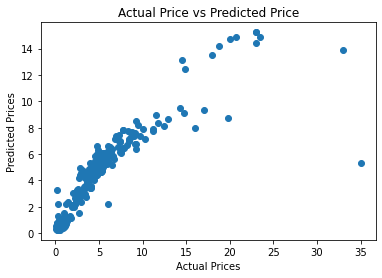

In [64]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

Prediction on test data

In [65]:
test_data_prediction = model_SVR.predict(X_test)

In [66]:
print(test_data_prediction)

[6.47193491 0.53718129 4.35765591 4.41769338 7.19682374 4.59642032
 3.50798081 6.95215751 0.42654587 5.3386269  6.24936555 5.80868407
 0.27534407 7.3125421  2.27783553 1.0045127  1.01372069 0.91273284
 7.60874264 4.42768105 1.00833541 7.32663637 0.77466111 7.17705708
 0.70256266 7.25751944 0.77401011 0.7477397  4.76138996 2.93688772
 0.71506009]


In [67]:
score_1 = metrics.r2_score(Y_test, test_data_prediction)

score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print(f"R squared error: {score_1}")
print(f"Mean Absolute Error: {score_2}")

R squared error: 0.8372691593722159
Mean Absolute Error: 0.8932000720772515


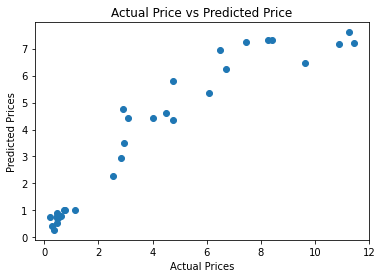

In [68]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

# Model Training

Model Training ---> Decision Tree Regression

In [69]:
model_DecisionTreeRegression = DecisionTreeRegressor(random_state = 0)

In [70]:
model_DecisionTreeRegression.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=0)

Evaluation
1. R Squared Error
2. Mean Absolute Error

Prediction on training data

In [71]:
training_data_prediction = model_DecisionTreeRegression.predict(X_train)

In [72]:
print(training_data_prediction)

[ 2.75  5.25  9.7   0.2   5.95  8.35  5.75  7.5   5.2  16.    0.8   0.4
  0.35  4.9   9.25  0.38  6.15 19.75  2.55  6.85  0.45  7.05  0.75  0.9
  0.38  0.4   4.    0.45  0.12 11.25  9.1   1.35  2.85  0.5   1.5   2.5
  1.15  0.6   0.75  0.48  3.75  4.85  0.55  2.75  4.6   0.48  1.35  7.4
  4.5   5.4   3.49  2.9   5.25  1.15  0.5   2.85  1.95  4.5   1.1   4.5
  6.25  5.11  1.2  33.    2.25  5.65  2.25  3.25  2.5  11.5   0.65  3.
  0.3   1.45 12.9   2.95  0.2   4.5  14.25  0.4   0.4   1.25  6.75  0.5
  7.5  23.    1.7   0.3   1.05  9.25  5.25  7.25 14.5   9.25  3.5   1.11
  5.25  0.3   1.1  10.11  0.6   8.99  0.31  0.6   3.8  10.25  7.45  0.35
  3.35  7.5   0.4   2.    4.    0.2   5.8   1.95  3.75  4.75  0.6   1.05
  0.45  1.35  3.    0.25  0.25  6.5   4.75  0.6   1.15  8.65  4.75  1.25
  8.75  4.95  2.1   0.2   4.9   6.    5.25  3.15  1.05  7.2   3.25  0.2
  5.25  3.9   2.65  1.2   5.5   4.    3.1  23.    0.16  0.65  4.8   1.2
  6.4   3.25  4.65  3.51  0.25  5.3  18.75  3.35  6.    1.75 

In [73]:
score_1 = metrics.r2_score(Y_train, training_data_prediction)

score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print(f"R squared error: {score_1}")
print(f"Mean Absolute Error: {score_2}")

R squared error: 1.0
Mean Absolute Error: 6.167905692361981e-19


Visualizing the actual Prices and predicted prices

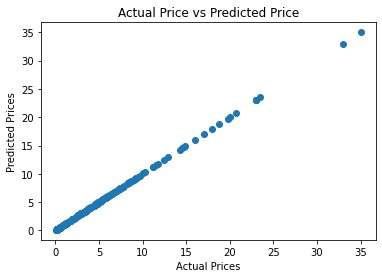

In [74]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

Prediction on test data

In [75]:
test_data_prediction = model_DecisionTreeRegression.predict(X_test)

In [76]:
print(test_data_prediction)

[ 9.25  0.75  4.    3.1   9.7   5.3   2.65  7.45  0.25  5.8   7.5   4.6
  0.25  8.65  2.9   0.9   0.6   0.48 12.5   4.15  1.35 12.5   0.48  9.15
  0.48  6.    0.65  0.12  3.1   2.7   0.48]


In [77]:
score_1 = metrics.r2_score(Y_test, test_data_prediction)

score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print(f"R squared error: {score_1}")
print(f"Mean Absolute Error: {score_2}")

R squared error: 0.9229237704374381
Mean Absolute Error: 0.5535483870967742


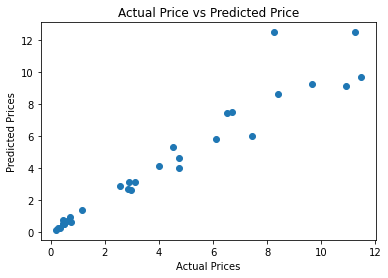

In [78]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

# Model Training

Model Training ---> Random Forest Regression

In [79]:
model_RandomForestRegression = RandomForestRegressor(n_estimators = 10, random_state = 0)

In [80]:
model_RandomForestRegression.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

Evaluation
1. R Squared Error
2. Mean Absolute Error

Prediction on training data

In [81]:
training_data_prediction = model_RandomForestRegression.predict(X_train)

In [82]:
print(training_data_prediction)

[ 2.905  5.475  9.49   0.272  6.01   8.515  5.71   7.435  5.08  16.165
  0.8    0.406  0.386  5.01   8.78   0.381  6.025 16.12   2.615  6.98
  0.454  6.675  0.66   0.86   0.372  0.4    4.125  0.485  0.132  9.325
  8.705  1.435  2.945  0.49   2.196  2.235  1.142  0.61   0.815  0.507
  3.88   4.925  0.504  2.86   4.36   0.43   1.51   6.47   4.561  4.97
  3.284  2.875  5.115  1.14   0.529  2.945  2.15   4.561  1.116  4.365
  6.215  5.44   1.235 30.175  2.46   5.595  2.295  3.275  3.375 10.819
  0.646  2.84   0.316  1.54  11.405  2.83   0.21   4.665 14.345  0.505
  0.417  1.835  6.58   0.416  7.41  22.1    1.67   0.256  0.975  8.525
  5.215  7.7   15.115  7.855  4.075  1.126  4.945  0.275  1.12  10.03
  0.546  9.465  0.318  0.575  3.722  9.485  7.215  0.55   3.255  6.79
  0.403  2.29   4.14   0.154  5.55   2.205  3.685  4.785  0.534  0.99
  0.438  1.285  3.095  0.232  0.3    6.885  5.225  0.591  1.135  9.015
  4.59   1.156  8.24   5.02   2.17   0.23   5.03   6.19   5.205  3.135
  1.09   6.

In [83]:
score_1 = metrics.r2_score(Y_train, training_data_prediction)

score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print(f"R squared error: {score_1}")
print(f"Mean Absolute Error: {score_2}")

R squared error: 0.9887326017755736
Mean Absolute Error: 0.25907037037037034


Visualizing the actual Prices and predicted prices

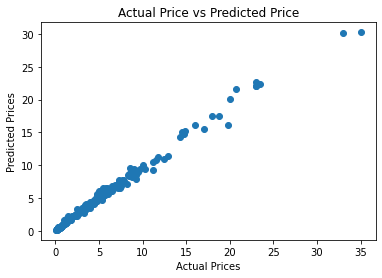

In [84]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

Prediction on test data

In [85]:
test_data_prediction = model_RandomForestRegression.predict(X_test)

In [86]:
print(test_data_prediction)

[ 7.58   0.602  3.97   3.455 10.995  4.71   3.415  6.62   0.255  5.55
  7.61   4.175  0.31   9.015  2.555  0.86   0.651  0.428 10.015  4.21
  1.205  7.78   0.446  9.27   0.631  7.4    0.647  0.141  3.105  2.43
  0.43 ]


In [87]:
score_1 = metrics.r2_score(Y_test, test_data_prediction)

score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print(f"R squared error: {score_1}")
print(f"Mean Absolute Error: {score_2}")

R squared error: 0.970352837340487
Mean Absolute Error: 0.3917419354838711


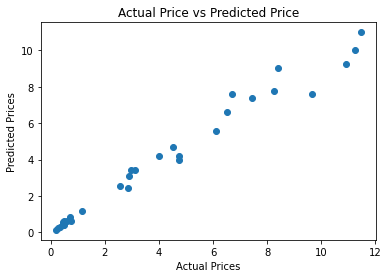

In [88]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()